# p-Hub problem



<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Problem-Description" data-toc-modified-id="Problem-Description-1">Problem Description</a></span><ul class="toc-item"><li><span><a href="#p-Hub-[1]" data-toc-modified-id="p-Hub-[1]-1.1">p-Hub <sup>[1]</sup></a></span></li><li><span><a href="#Integer-programming-model:" data-toc-modified-id="Integer-programming-model:-1.2">Integer programming model:</a></span></li></ul></li><li><span><a href="#Setup" data-toc-modified-id="Setup-2">Setup</a></span><ul class="toc-item"><li><span><a href="#Set-up-the-environment-by-importing-libraries" data-toc-modified-id="Set-up-the-environment-by-importing-libraries-2.1">Set up the environment by importing libraries</a></span></li></ul></li><li><span><a href="#Example" data-toc-modified-id="Example-3">Example</a></span><ul class="toc-item"><li><span><a href="#Case1.-Solving-p-Hub-problems-with-synthetic-data" data-toc-modified-id="Case1.-Solving-p-Hub-problems-with-synthetic-data-3.1">Case1. Solving p-Hub problems with synthetic data</a></span></li><li><span><a href="#Case2.-Solving-p-Hub-problems-with-real-world-data" data-toc-modified-id="Case2.-Solving-p-Hub-problems-with-real-world-data-3.2">Case2. Solving p-Hub problems with real-world data</a></span></li></ul></li></ul></div>

## Problem Description

###  p-Hub <sup>[1]</sup>
*Parameters*:
* $N$:  Set of nodes
* $C_{ij}$: Distance from node $i \in N$ to node $j\in N$. It is assumed that $C_{ii} = 0 (i\in N)$ and that the distances satisty the triangle inequality collection
* $P^{C},P^{D},P^{T}$: Collection,Distribution and Transfer cost
* $W_{ij}$: Flow originated at node $i\in N$ that is destined to node $j\in N$
* $O_i=\sum_{j}W_{ij}$: Total flow originated at node $i\in N$
* $D_i=\sum_{j}W_{ji}$: Total flow destined to node $i\in N$
* $y_{ikh}$: Amount of flow originated at node $i \in N$ that is routed via hubs $k$ and $h$ in this order ($i,k,h\in N$)

*Decision variables*:
$$\begin{array}{lll}
x_{ik}= \begin{cases}1, & \text { if demand } i \text { is allocated to hub } k \\ 0, & \text { else }\end{cases}\\
\end{array}
$$


###  Integer programming model:
$$
\begin{array}{lll}
\text{min} & \sum_{ik}P^{C}C_{ik}O_{i}x_{ik}+\sum_{ikh}P^{T}C_{kh}y_{ikh}+\sum_{ik}P^{D}C_{ki}D_{i}x_{ik} & (1) \\
\text{s.t.} & \sum_{k}x_{ik}=1, \quad \forall i & (2) \\
& x_{ik}\leq x_{kk}, \quad \forall i,k & (3) \\
& \sum_{k}x_{kk}=H & (4) \\
& \sum_{h}y_{ikh}-\sum_{h}y_{ihk}=O_{i}x_{ik}-\sum_{j}W_{ij}x_{jk},\quad \forall i,k & (5) \\
& \sum_{h\neq k}y_{ikh}\leq O_{i}x_{ik},\quad \forall i,k & (6)\\
& x_{ik}\in \{0,1\} \quad \forall i,k & (7)\\
& y_{ikh}\geq 0 \quad \forall i,k,h & (8)\\
\end{array}
$$

[1] Campbell J F. Hub location and the p-hub median problem[J]. Operations research, 1996, 44(6): 923-935.

## Setup

### Set up the environment by importing libraries
import numpy, pulp, matplotlib, pandas and Hispot libraries to set up an environment

In [1]:
import random
import numpy as np
import pandas as pd
from pulp import *
import matplotlib.pyplot as plt
from hispot.FLP import PHub

PuLP is an open source linear programming package (actually also includes integer programming). You can use `pip install pulp` to start. 

PuLP supports many open source linear programming solvers, such as `CBC` and `GLPK`; in addition, it also supports commercial solvers such as `Gurobi` and IBM's `CPLEX`.
The default is CBC, and PuLP will be installed by default. For most problems, the CBC open source solver from COIN-OR will suffice.
You can use `listSolvers(onlyAvailable=True)` to check the available solvers.

In [2]:
np.random.seed(0) # random seed
solver_list = listSolvers(onlyAvailable=True)
print(solver_list) 

['CPLEX_CMD', 'GUROBI_CMD', 'PULP_CBC_CMD']


## Example

In this part, we will input synthetic data and real-world data and display them as two examples to represent random cases and real-world scenarios, respectively.

### Case1. Solving p-Hub problems with synthetic data

Generate problem with synthetic data

In [3]:
num_points = 10
num_hubs = 3
PC, PT, PD = 1, 1, 1
# PC, PT, PD = 1.0, 0.75, 1.25
weight = np.random.randint(1, 2, size=(num_points, num_points))
points = [(random.random(), random.random()) for i in range(num_points)]
points_np = np.array(points)


Output optimal solution

In [5]:
%%time
hubs, assigns, obj = PHub(num_points=num_points,
                          points=points_np,
                          solver=PULP_CBC_CMD(),
                          num_located=num_hubs,
                          weight=weight,
                          collect_cost=PC,
                          transfer_cost=PT,
                          distribution_cost=PD).prob_solve()

Status: Optimal
Selected Hubs = [0, 1, 6]
Assigned relationships =  {0: [0, 2, 3], 1: [1, 4, 5], 6: [6, 7, 8, 9]}
Minimum total cost = 62.23906053930718
CPU times: total: 46.9 ms
Wall time: 293 ms


Visualize optimal solution

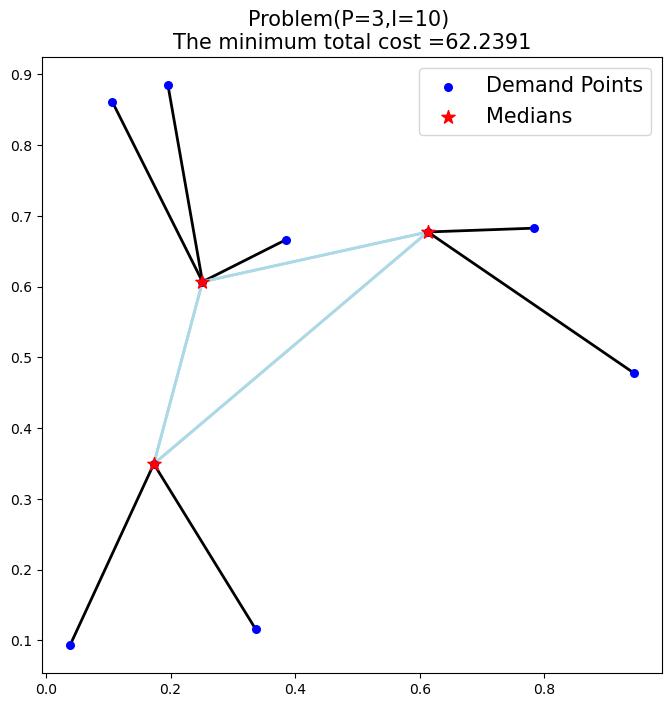

In [6]:
plt.figure(figsize=(8,8))
name = 'Problem(P=' + str(num_hubs) + ',I=' + str(num_points) + ') \nThe minimum total cost =' + str(round(obj,4))
plt.title(name, fontsize = 15)

#Points
plt.scatter(*zip(*points_np), c='Blue', marker='o',s=30, label = 'Demand Points', zorder=2)
plt.scatter(*zip(*points_np[hubs]), c='Red', marker='*',s=100,label = 'Medians',zorder=3)
#Lines
for i in assigns:
    center_point = points_np[i]
    for j in assigns[i]:
        demand_points = points_np[j]
        pts = [points[i], points[j]]
        plt.plot(*zip(*pts), c='Black', linewidth=2, zorder=1)
for i in hubs:
    for j in hubs:
        if i != j:
            h = [points[i], points[j]]
            plt.plot(*zip(*h), c='Lightblue', linewidth=2, zorder=1)
# plt.grid(True)   
plt.legend(loc='best', fontsize = 15) 
plt.show()

### Case2. Solving p-Hub problems with real-world data

import `geopandas`, `geoplot` to plot the real world map.

In [7]:
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
import numpy as np
import matplotlib.pyplot as plt

We select Fengtai District of Beijing the study area and read partial poi points in Fengtai District.

In [8]:
%%time
region=gpd.read_file("../data/beijing/fengtai/fengtai.shp")
region.head(2)

CPU times: total: 15.6 ms
Wall time: 18 ms


,ID,geometry
0,1,"POLYGON ((116.42039 39.85679, 116.41767 39.856..."
1,2,"MULTIPOLYGON (((116.30331 39.85959, 116.30498 ..."


Partial POI data in Fengtai district

In [9]:
%%time
poi = gpd.read_file("../data/beijing/fengtai/fengtai-poi.shp")
poi.shape[0]

CPU times: total: 15.6 ms
Wall time: 7 ms


60

In [10]:
def render_north_arrow(ax, x, y, size, ratio = 1):
    path = [(0, 1), (-ratio, -1), (0, -0.5), (ratio, -1), (0, 1)]
    path = [(i[0] * size + x, i[1] * size + y) for i in path]
    arrow = plt.Polygon(path, color='black', transform=ax.transAxes)
    ax.add_patch(arrow)
    ax.text(x, y-size*2, s = 'N', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

Visualization of the input data by geoplot

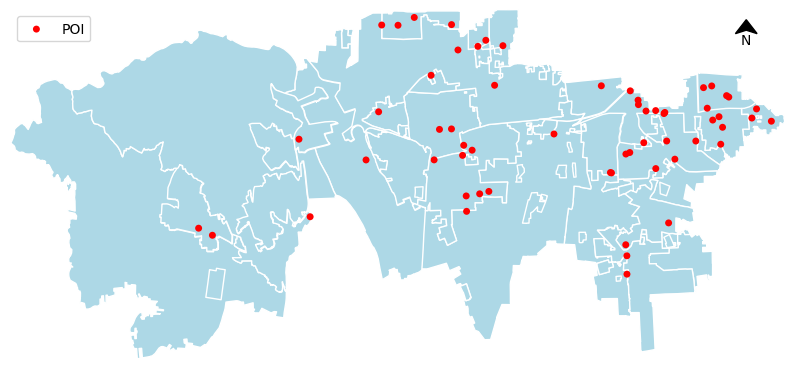

In [12]:
ax = gplt.polyplot(region,
                   projection=gcrs.AlbersEqualArea(),
                   edgecolor="white", facecolor="lightblue",
                   figsize=(10, 9))
gplt.pointplot(poi, 
               extent=region.total_bounds,
               s=5,
               color='red',
               alpha=1,
               linewidth=0,
               label='POI',
               ax=ax)
plt.legend(loc='upper left')
render_north_arrow(ax = ax, x = 0.95, y = 0.95, size = 0.02,ratio = 0.7)

Generate problem with real-world data

In [16]:
data = poi[['lon', 'lat']]
num_points = poi.shape[0]
num_hubs = 5
points = [(data['lon'][i], data['lat'][i]) for i in range(num_points)]
points_np = np.array(points)
PC, PT, PD = 1.0, 0.75, 1.25
weight = np.random.randint(1, 2, size=(num_points, num_points))

Output optimal solution

In [ ]:
%%time
hubs, assigns, obj = PHub(num_points=num_points,
                          points=points_np,
                          solver=GUROBI(),
                          num_located=num_hubs,
                          weight=weight,
                          collect_cost=PC,
                          transfer_cost=PT,
                          distribution_cost=PD).prob_solve()

prepare the LineString and center Points to plot the solution

In [ ]:
from shapely.geometry import LineString
crs = 'EPSG:4326'
lines = gpd.GeoDataFrame(columns=['id', 'geometry'], crs=crs)
k = 0
for i in assigns:
    center = points_np[i]
    for j in assigns[i]:
        assign = points_np[j]
        line = LineString([center, assign])
        lines.loc[k] = [k+1, line]
        k = k+1
for m in hubs:
    for n in hubs:
        if m != n:
            c1 = points_np[m]
            c2 = points_np[n]
            line = LineString([c1, c2])
            lines.loc[k] = [k+1, line]
            k = k+1
center_points = poi.iloc[hubs]

In [ ]:
ax = gplt.sankey(lines, 
                 projection=gcrs.Mollweide(),
                 linewidth=1,
                 color='green',
                 zorder=3,
                 figsize=(10, 8),)
gplt.polyplot(region,
              projection=gcrs.AlbersEqualArea(),
              edgecolor="white", 
              facecolor="lightblue",
              zorder=1,
              ax=ax,)
gplt.pointplot(poi, 
               extent=region.total_bounds,
               s=5,
               color='blue',
               alpha=1,
               linewidth=0,
               label='POI',
               zorder=2,
               ax=ax)
gplt.pointplot(center_points, 
               extent=region.total_bounds,
               s=10,
               color='red',
               alpha=1,
               linewidth=0,
               marker='*',
               label='Medians',
               zorder=4,
               ax=ax)
render_north_arrow(ax = ax, x = 0.95, y = 0.95, size = 0.02,ratio = 0.7)
plt.legend(loc='upper left')